# **Obtención y preparación de datos**

#OD06. Tarea 1: Modelo Epidemiológico Básico

Adaptado de Contagio Lineal, Leonardo Martinez Sandoval, 2019.


## <font color='orange'>**Objetivo**</font>

Construir un modelo epidemiológico básico usando álgebra lineal. Para ello, se modelará la epidemia como un **modelo de Markov**.

*Nota 1: En primer lugar debe quedar claro que ningún modelo es una representación perfecta de la realidad. Su validez depende de lo razonables que sean las estimaciones o suposiciones tomadas y de su grado de aproximación a la realidad*

Con este modelo básico, se podrán verificar ciertas acciones que se pueden aplicar durante una crisis pandémica.

Se estudiarán dos escenarios posibles:

1. La gente sale de sus casas (contagio alto).
2. La gente se queda en sus casas (contagio bajo).

Para modelar se usarán las librerías **NumPy** y **Matplotlib**.

*Nota 2: La librería Matplotlib se revisará en detalle en el módulo 3 del diplomado. En esta actividad la utilizaremos para graficar los resultados de nuestro modelo.*

El objetivo es construir un modelo que nos permita visualizar la evolución de la enfermedad en el tiempo (ver figura).

<img src='https://drive.google.com/uc?export=view&id=1JEQuOy062yyASrdO3xmNtCO25nITmvWW' width="500" align="center" style="margin-right: 20px">

## <font color='blue'>**¿Qué es un modelo de Markov?**</font>

Un modelo de Markov aplicado al campo sanitario puede definirse como **un modelo estocástico de una enfermedad en el que se asume que el paciente se encuentra siempre en uno de un número finito de estados de salud**, denominados estados de Markov, los cuales deben ser **exhaustivos**, es decir, todos los posibles; y **mutuamente excluyentes**, un individuo no puede estar en dos estados al mismo tiempo.

Los estados pueden ser de dos tipos:

1. **Absorbentes**: aquellos que no pueden abandonarse, siendo el más habitual y obvio el estado de *muerte*.

2. **No absorbentes**: cualquier estado desde el que se puede pasar a otro distinto.

Los acontecimientos se modelizan como pasos o transiciones de unos estados a otros que se producen en períodos uniformes de tiempo, que se denominan ciclos de Markov, y con una probabilidad de transición que depende del estado en el que se encuentre el individuo en cada momento.

Los modelos de Markov pueden representarse gráficamente como una variante de los árboles de decisión empleados en los modelos determinísticos, como diagramas en cascada, o bien como un diagrama de influencias.

Veamos las posibles representaciones gráficas de los modelos de Markov en los siguientes diagramas:
<br>
A: como árboles de decisión. <br>
B: como diagramas en cascada. <br>
C: como diagramas de influencia.<br>

<img src='https://drive.google.com/uc?export=view&id=1G6b3vQaQLBJ2kcXlYsCWVrZeoAcqpm_P' width="600" align="center" style="margin-right: 20px">


*Referencia: C. Rubio Terrés, "Introduction to the use of Markov models in pharmacoeconomic analysis," Farmacia Hospitalaria, vol. 24, n°4, 241-247, 2000.*

### ¿Cuándo debe utilizarse un modelo de Markov y con qué condiciones?

Puede estar justificado utilizar un modelo de Markov cuando se trata de eventos repetitivos, irreversibles y de larga duración. En caso de realizarse, las condiciones generales de los modelos de Markov son las siguientes:

* Sólo se permiten unas determinadas transiciones entre estados previamente establecidas.

* La duración de los ciclos de Markov, que es arbitraria, debe ser constante a lo largo de la simulación.

* Cada paciente sólo puede hacer una transición en cada ciclo.

* Todos los pacientes están sometidos a las mismas probabilidades de transición.

### Ventajas e inconvenientes de los modelos de Markov

Los modelos de Markov ayudan a modelizar eventos sanitarios complejos que pueden simplificarse en exceso con los modelos determinísticos.

Son especialmente útiles para modelizar enfermedades crónicas. La modelización de Markov intenta simular de una manera más *«realista»* lo que ocurre en el proceso de la enfermedad. Sin embargo, en algunas ocasiones este tipo de modelo puede ser inviable debido a la insuficiencia de los datos disponibles. Por ejemplo, en modelos muy complejos puede ser difícil establecer la totalidad de las probabilidades de transición entre los estados de salud.

Por otra parte, en los modelos se hace una suposición bastante fuerte, la denominada suposición markoviana. De acuerdo con ésta **el modelo carece de «memoria»** y se asume que conociendo únicamente el estado de salud presente de un paciente es posible simular la evolución futura del mismo; es decir, se asume que todos los pacientes que se encuentran en un estado de salud, en un momento concreto, tienen el mismo pronóstico, independientemente de su estado previo. Por tanto, un paciente que pasa del estado *«sano»* al de *«enfermo»* tendría el mismo pronóstico que otro paciente *«enfermo»* que transcurrido el ciclo siguiese en el mismo estado de *«enfermo»*. Esta suposición del modelo no se ajusta estrictamente a la realidad de numerosas enfermedades, por lo que supone un inconveniente de los modelos de Markov.

## <font color='blue'>**Modelo epidemiológico básico**</font>

### Suposiciones y modelo de Markov

1. La población inicial es de 100.000 habitantes sanos, en el día 0.

2. Una persona puede estar en alguno de los siguientes cinco estados:
    * Sano
    * Síntomas leves
    * Síntomas graves
    * Recuperado
    * Fallecido

3. Asociado a los estados anteriores podemos obtener las siguientes probabilidades de transición:
    * $s_l$, la probabilidad de pasar de estar sano a tener síntomas leves,
    * $l_g$, la probabilidad de pasar de tener síntomas leves a graves,
    * $l_r$, la probabilidad de pasar de tener síntomas leves a recuperarse,
    * $g_r$, la probabilidad de pasar de tener síntomas graves a recuperarse y
    * $g_f$, la probabilidad de pasar de tener síntomas graves, a fallecer.

Para cada día $n$, consideremos el vector:

$$\mathbf{X}(n) = \begin{pmatrix}s(n), l(n), g(n), r(n), f(n)\end{pmatrix}$$

que corresponde a los individuos sanos, los de síntomas leves, de síntomas graves, recuperados y fallecidos al día $n$.

Por ejemplo al día $0$ todos los individuos están sanos, así que $X(0)=(100000,0,0,0,0)$.

Para la evolución entre los distintos estados de Markov, se realizan las siguientes suposiciones:

1. Paso de un estado a otro:
    * Los únicos fallecidos del periodo de tiempo que tendremos son por la enfermedad en estudio. Sólo se puede fallecer de ello tras tener síntomas graves. Si alguien tiene síntomas graves, entonces tiene cierta probabilidad $g_f$ de fallecer al día siguiente, $g_r$ de recuperarse y por lo tanto $(1-g_r-g_f)$ de quedarse como enfermo grave.
        
    * Esta enfermedad se contagia de persona a persona, y de un día a otro una persona tiene probabilidad $s_l$ de pasar de estar sana a tener síntomas leves. No se puede pasar directamente a tener síntomas graves, recuperarse o morir. De modo que se queda sana de un día a otro con probabilidad $(1-s_l)$.
        
    * Si una persona tiene síntomas leves, tiene probabilidad $l_g$ de pasar a tener síntomas graves y $l_r$ de pasar a recuperarse. Por lo tanto, tiene probabilidad $(1-l_g-l_r)$ de quedarse con síntomas leves.
        
    * Una persona que se recupera desarrolla inmunidad a la enfermedad, así que se queda en ese estado.
        
    * Una persona que fallece, se queda en ese estado.
    
En otras palabras, tenemos el siguiente diagrama de infleuncia para las transiciones de un estado a otro, en donde los números en las flechas muestran la probabilidad de pasar de un estado a otro:

<img src='https://drive.google.com/uc?export=view&id=14xNoCzg-RxK7-34axR-MIkhaJ9c86BkU' width="800" align="center" style="margin-right: 20px">

Con estos números y suposiciones, podemos entender, en valor esperado, cómo será el vector de población
<br><br>
$$\mathbf{X}(n+1) = \begin{pmatrix}s(n+1), l(n+1), g(n+1), r(n+1), f(n+1)\end{pmatrix}$$
<br>
si sabemos cómo es el vector
<br><br>
$$\mathbf{X}(n) = \begin{pmatrix}s(n), l(n), g(n), r(n), f(n)\end{pmatrix}$$
<br>
Por ejemplo, podemos esperar que la cantidad de recuperados al día $n+1$ sea:
<br><br>
$$r(n+1) = l_r·l(n) + g_r·g(n) + 1·r(n)$$
<br>
pues de los de síntomas leves del día $n$ habrá una proporción $l_r$ de ellos que se recuperen, de los graves del día $n$ habrá una proporción $g_r$ de ellos que se recuperen, y todos los recuperados del día $n$ se quedan recuperados. De esta forma, obtenemos el siguiente sistema de ecuaciones de lo que podemos esperar:
<br><br>
$$
\begin{align}
s(n+1)& = (1 - s_l)\times s(n) \\[0.4em]
l(n+1)& = s_l\times s(n)+(1-l_r-l_g)\times l(n) \\[0.4em]
g(n+1)& = l_g\times l(n)+(1-g_r-g_f)\times g(n) \\[0.4em]
r(n+1)& = l_r\times l(n)+g_r\times g(n)+1\times r(n) \\[0.4em]
f(n+1)& = g_f\times g(n)+1\times f(n)
\end{align}
$$
<br><br>
Este sistema de ecuaciones se puede escribir de una forma mucho más compacta. Si definimos la matriz:
<br><br>
$$\mathbf{A}=\begin{pmatrix} 1-s_l & 0 & 0 & 0 & 0 \\s_l & 1-l_r-l_g & 0 & 0 & 0 \\0 & l_g & 1-g_r-g_f & 0 & 0 \\ 0 & l_r & g_r & 1 & 0\\ 0 & 0 & g_f & 0 & 1 \end{pmatrix}$$
<br><br>
las ecuaciones anteriores se pueden abreviar simplemente a:
<br><br>
$$X(n+1)=AX(n)$$
<br>
De esta forma, si queremos entender qué esperar del día $n$, basta hacer la multiplicación matricial:
<br><br>
$$X(n)=A^n X(0)$$

### <font color='green'>Actividad 1</font>
### Escenario 1: Tasa de contagio alta

Se tienen los siguientes valores para los parámetros del modelo: $s_l=0.30$, $l_g=0.10$, $l_r=0.20$, $g_r=0.10$ y $g_f=0.10$.

1. Implmente el modelo epidemiológico básico mediante una función en Python.

2. Grafique los resultados de su modelo para mostrar como evoluciona el contagio para un periodo de 60 días.

3. Entregue los resultados para la evolución de la enfermedad en la primera semana de análisis.

4. Para el último día de la ventana de estudio, calcule la cantidad de individuos recuperados y fallecidos.

In [ ]:
# Opción 2 Mejorada

import numpy as np
import matplotlib.pyplot as plt

# Población inicial
pob_inicial = (100000, 0, 0, 0, 0)

# Número de días a simular
dias = 60

# Probabilidades de transición
S_L = 0.30
L_G = 0.10
L_R = 0.20
G_R = 0.10
G_F = 0.10

# Función de modelo epidemiologico básico
def modelo_epidemiologico(pob_inicial, dias, S_L, L_G, L_R, G_R, G_F):
    A = np.array([[1-S_L, 0, 0, 0, 0],
                  [S_L, 1-L_G-L_R, 0, 0, 0],
                  [0, L_G, 1-G_R-G_F, 0, 0],
                  [0, L_R, G_R, 1, 0],
                  [0, 0, G_F, 0, 1]])

    # result_evo = [pob_inicial]  ; Append será deprecado, así que reemplazamos estas 4 lineas de codigo por las 5 líneas
    #return result_evo
    #for j in range(dias):
    #    result_evo.append(np.matmul(A, result_evo[-1]))

# Creamos una matriz con los días del experimento más el día 0 y 5 columnas que son el estado de las personas
    result_evo = np.zeros((dias + 1, 5))
# Fila 0 de result_evo es la primera columna de población inicial
    result_evo[0] = pob_inicial

# Calculo de evolución de la enfermedad en la población según los días especificados.
    for j in range(dias):
        result_evo[j + 1] = np.matmul(A, result_evo[j])   #
    return result_evo

# Resultado de la evolución de la epidemia en 60 días
result_mod_evo1 = modelo_epidemiologico(pob_inicial, dias, S_L, L_G, L_R, G_R, G_F)

# Recorre y muestra el resultado de modelo de evolución de la enfermedad (escenario 1)
titulos_columnas = ["Días", "Sanos", "Leves", "Graves", "Recuperados", "Fallecidos"]
print("\t\t".join(titulos_columnas[:5]), "\t", titulos_columnas[-1])
for dia, poblacion in enumerate(result_mod_evo1):
     print(f"Día {dia}:", *poblacion.astype(int), sep="\t\t")



Días		Sanos		Leves		Graves		Recuperados 	 Fallecidos
Día 0:		100000		0		0		0		0
Día 1:		70000		30000		0		0		0
Día 2:		49000		42000		3000		6000		0
Día 3:		34300		44100		6600		14700		300
Día 4:		24010		41160		9690		24180		960
Día 5:		16807		36015		11868		33381		1929
Día 6:		11764		30252		13095		41770		3115
Día 7:		8235		24706		13501		49130		4425
Día 8:		5764		19765		13272		55422		5775
Día 9:		4035		15564		12594		60702		7102
Día 10:		2824		12106		11631		65075		8362
Día 11:		1977		9321		10516		68659		9525
Día 12:		1384		7118		9345		71575		10577
Día 13:		968		5398		8187		73933		11511
Día 14:		678		4069		7090		75831		12330
Día 15:		474		3052		6079		77354		13039
Día 16:		332		2278		5168		78573		13647
Día 17:		232		1694		4362		79545		14164
Día 18:		162		1256		3659		80320		14600
Día 19:		113		928		3053		80938		14966
Día 20:		79		683		2535		81429		15271
Día 21:		55		502		2096		81819		15525
Día 22:		39		368		1727		82129		15734
Día 23:		27		269		1419		82376		15907
Día 24:		19		197		1162		82572		16

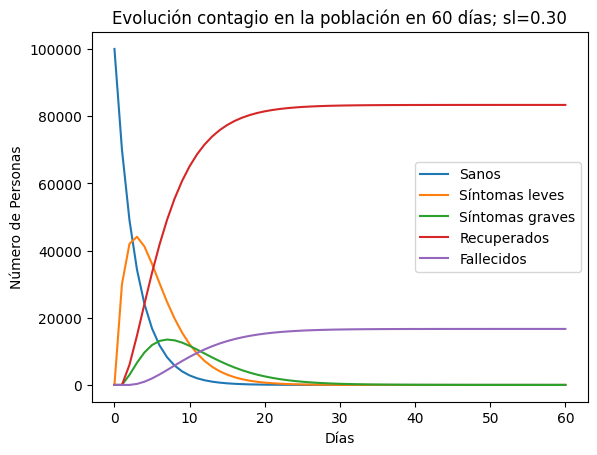

In [ ]:
# 2. Grafique los resultados de su modelo para mostrar como evoluciona el contagio para un periodo de 60 días. Cotagios

# plot es utilizado para crear gráfico con los resultados del modelo 1 (tasa de contagio de 30%), mostrando la evolución
# de los 5 estados: Sano, sintomas leves, sintomas graves, recuperados y fallecidos.
plt.plot([i[0] for i in result_mod_evo1], label="Sanos")
plt.plot([i[1] for i in result_mod_evo1], label="Síntomas leves")
plt.plot([i[2] for i in result_mod_evo1], label="Síntomas graves")
plt.plot([i[3] for i in result_mod_evo1], label="Recuperados")
plt.plot([i[4] for i in result_mod_evo1], label="Fallecidos")

# Muestra en el gráfico los titulos superiores, nombre de los valores x e y
plt.title("Evolución contagio en la población en 60 días; sl=0.30")
plt.xlabel("Días")
plt.ylabel("Número de Personas")
plt.legend()
plt.show()

In [ ]:
# 3. Entregue los resultados para la evolución de la enfermedad en la primera semana de análisis.


# Definimos la variable 'primera_semana' para representar los primeros 7 días de la semana y luego extraemos los
# primeros 8 elementos, desde el día 0 hasta el día 7, y los almacenamos en una lista de resultados.
primera_semana = 7
result_primera_semana = result_mod_evo1[:primera_semana + 1]


# Lista 'titulos_columnas' contiene los nombres de las columnas que se mostrarán cuando se imprima la información.
# titulos_columnas = ["Días", "Sanos", "Síntomas Leves", "Síntomas Graves", "Recuperados", "Fallecidos"]
titulos_columnas = ["Días", "Sanos", "Leves", "Graves", "Recuperados", "Fallecidos"]
print("\t\t".join(titulos_columnas[:5]), "\t", titulos_columnas[-1])


# Muestra la evolución de la epidemia en la primera semana. Los resultados son deplegados en filas tabuladas que
# representan cada día y las cifras de población correspondientes.
for dia, poblacion in enumerate(result_primera_semana):
    #print(f"Día {dia}: {poblacion.astype(int)}")
    fila = [str(dia)]
    fila.extend(map(str, poblacion.astype(int)))
    print("\t\t".join(fila))


Días		Sanos		Leves		Graves		Recuperados 	 Fallecidos
0		100000		0		0		0		0
1		70000		30000		0		0		0
2		49000		42000		3000		6000		0
3		34300		44100		6600		14700		300
4		24010		41160		9690		24180		960
5		16807		36015		11868		33381		1929
6		11764		30252		13095		41770		3115
7		8235		24706		13501		49130		4425


In [ ]:
# 4. Para el último día de la ventana de estudio, calcule la cantidad de individuos recuperados y fallecidos.

print(f"Individuos recuperados último día : {int(result_mod_evo1[-1][3])}")
print(f"Individuos fallecidos último día  : {int(result_mod_evo1[-1][4])}")

Individuos recuperados último día : 83333
Individuos fallecidos último día  : 16666


En Numpy se pueden multiplicar matrices con la función:

```
np.matmul(A,X)
```

<font color='green'>Fin actividad 1</font>

### <font color='green'>Actividad 2</font>

### Escenario 2: Menor tasa de contagio

Considere que la tasa de contagio $s_l$ disminuye y tiene un valor de 0.05. Todas las otras probabilidades de transición se mantienen inalteradas con respecto al escenario 1. Considere una ventana de análisis de 60 días.

1. Ejecute el modelo epidemiológico con las nuevas condiciones iniciales.

2. Grafique la evolución del modelo para el escenario 2.

3. Compare los escenarios 1 y 2 en términos de la cantidad de personas fallecidas a los 30 y 60 días.

4. Considere que la capacidad total del sistema de salud es de 6.000 camas. Grafique los enfermos leves y graves para ambos escenarios en conjunto con la capacidad del sistema de salud. Comente los resultados.

5. Considerando que sólo los enfermos graves utilizan camas del sistema de salud, indique, para ambos escenarios, en qué día el sistema colapsa (existen más casos graves que camas disponibles).

6. Grafique la curva de fallecidos para ambos escenarios para todo el periodo de tiempo analizado.

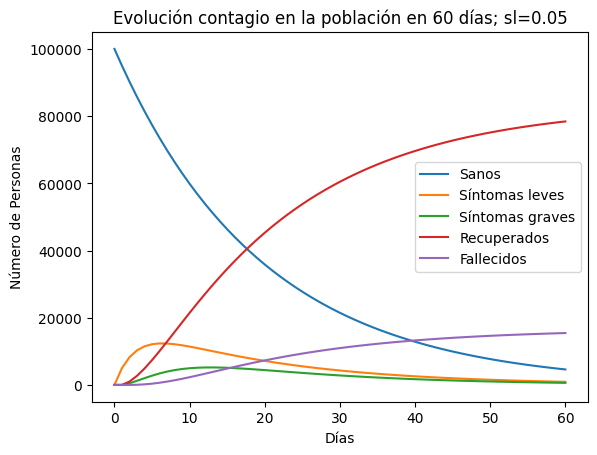

In [ ]:
# Tu código aquí ...

# Tasa de contagio SL tiene un valor de 0.05. Todas las otras probabilidades de transición se mantienen inalteradas con respecto al escenario 1.
# Considere una ventana de análisis de 60 días.


# 1. Ejecute el modelo epidemiológico con las nuevas condiciones iniciales.

# S_L2 toma el valor de 0.05. Llamamos a la función de modelo epidemiologico, reemplazando S_L por S_L2 para obtener nuevos
# resultados conservando las probabilidades y los días del modelo anterior.
S_L2 = 0.05
result_mod_evo2 = modelo_epidemiologico(pob_inicial, dias, S_L2, L_G, L_R, G_R, G_F) #dias estaba en 60 en ejercio 1.


#2. Grafique la evolución del modelo para el escenario 2.

# plot es utilizado para crear gráfico con los resultados del modelo 2 (tasa de contagio de 5%), mostrando la evolución
# de los 5 estados: Sano, sintomas leves, sintomas graves, recuperados y fallecidos.
plt.plot([i[0] for i in result_mod_evo2], label="Sanos")
plt.plot([i[1] for i in result_mod_evo2], label="Síntomas leves")
plt.plot([i[2] for i in result_mod_evo2], label="Síntomas graves")
plt.plot([i[3] for i in result_mod_evo2], label="Recuperados")
plt.plot([i[4] for i in result_mod_evo2], label="Fallecidos")

# Muestra en el gráfico los titulos superiores, nombre de los valores x e y
plt.title("Evolución contagio en la población en 60 días; sl=0.05")
plt.xlabel("Días")
plt.ylabel("Número de Personas")
plt.legend()
plt.show()

In [ ]:
# Recorre y muestra el resultado de modelo de evolución de la enfermedad (escenario 2) solo para visualizar los resultados.

print("\t\t".join(titulos_columnas[:5]), "\t", titulos_columnas[-1])

for dia, poblacion in enumerate(result_mod_evo2):
    #print(f"Día {dia}: {poblacion.astype(int)}")
    print(f"Día {dia}:", *poblacion.astype(int), sep="\t\t")

Días		Sanos		Leves		Graves		Recuperados 	 Fallecidos
Día 0:		100000		0		0		0		0
Día 1:		95000		5000		0		0		0
Día 2:		90250		8250		500		1000		0
Día 3:		85737		10287		1225		2700		50
Día 4:		81450		11488		2008		4880		172
Día 5:		77378		12114		2755		7378		373
Día 6:		73509		12348		3416		10076		648
Día 7:		69833		12319		3967		12888		990
Día 8:		66342		12115		4406		15749		1387
Día 9:		63024		11797		4736		18612		1827
Día 10:		59873		11409		4968		21445		2301
Día 11:		56880		10980		5116		24224		2798
Día 12:		54036		10530		5190		26932		3310
Día 13:		51334		10073		5205		29557		3829
Día 14:		48767		9617		5171		32092		4349
Día 15:		46329		9170		5099		34533		4866
Día 16:		44012		8736		4996		36877		5376
Día 17:		41812		8315		4870		39124		5876
Día 18:		39721		7911		4728		41274		6363
Día 19:		37735		7524		4573		43330		6836
Día 20:		35848		7153		4411		45292		7293
Día 21:		34056		6800		4244		47164		7735
Día 22:		32353		6462		4075		48948		8159
Día 23:		30735		6141		3906		50648		8567
Día 24:		29198		5835		

In [ ]:
# 3. Compare los escenarios 1 y 2 en términos de la cantidad de personas fallecidas a los 30 y 60 días.

# Se obtiene los fallecidos, valor que se encuentra en la columna 4, de los días 30 y 60 de ambos modelos vistos en
# los ejercicios anteriores del notebook, y el resultado convierte en número entero.
fall_30_evo1 = int(result_mod_evo1[30][4])
fall_30_evo2 = int(result_mod_evo2[30][4])
fall_60_evo1 = int(result_mod_evo1[60][4])
fall_60_evo2 = int(result_mod_evo2[60][4])

# Muestra de los fallecidos de ambos modelos a los días 30 y 60.
print("Fallecidos a los 30 días (Contagio 0.30):", fall_30_evo1)
print("Fallecidos a los 30 días (Contagio 0.05):", fall_30_evo2)
print(f"Comparando la tasa de contagio de ambos modelos, se produce una diferencia de {(fall_30_evo1-fall_30_evo2)} fallecidos a los 30 días", '\n')
print("Fallecidos a los 60 días (Contagio 0.30):", fall_60_evo1)
print("Fallecidos a los 60 días (Contagio 0.05):", fall_60_evo2)
print(f"Comparando la tasa de contagio de ambos modelos, se produce una diferencia de {(fall_60_evo1-fall_60_evo2)} fallecidos a los 60 días", '\n')


Fallecidos a los 30 días (Contagio 0.30): 16493
Fallecidos a los 30 días (Contagio 0.05): 10963
Comparando la tasa de contagio de ambos modelos, se produce una diferencia de 5530 fallecidos a los 30 días 

Fallecidos a los 60 días (Contagio 0.30): 16666
Fallecidos a los 60 días (Contagio 0.05): 15438
Comparando la tasa de contagio de ambos modelos, se produce una diferencia de 1228 fallecidos a los 60 días 



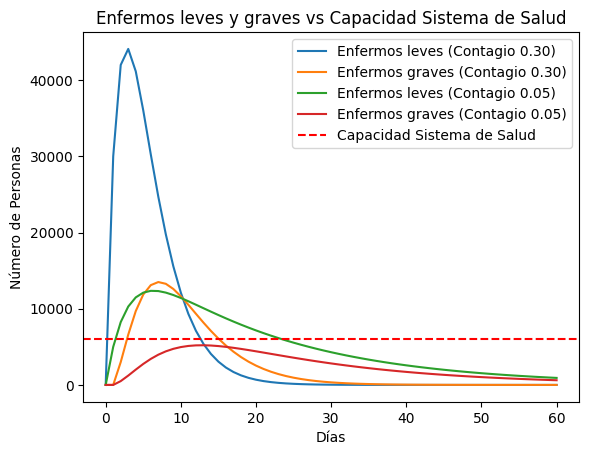

In [ ]:
# 4. Considere que la capacidad total del sistema de salud es de 6.000 camas.
# Grafique los enfermos leves y graves para ambos escenarios en conjunto con la capacidad del sistema de salud. Comente los resultados.

capacidad_camas = 6000

# Graficamos la evolución de los enfermos leves (elemento 1) y graves (elemento 2) en función de los días, extrayendo la información de
# los resultados de modelos 1 y 2 vistos en ejercicios anteriores.
plt.plot([i[1] for i in result_mod_evo1], label="Enfermos leves (Contagio 0.30)")
plt.plot([i[2] for i in result_mod_evo1], label="Enfermos graves (Contagio 0.30)")
plt.plot([i[1] for i in result_mod_evo2], label="Enfermos leves (Contagio 0.05)")
plt.plot([i[2] for i in result_mod_evo2], label="Enfermos graves (Contagio 0.05)")

# Graficamos las capacidad de cama del sistema de salud, siendo una constante.
plt.axhline(y=capacidad_camas, color='r', linestyle='--', label="Capacidad Sistema de Salud")

# Muestra en el gráfico los titulos superiores, nombre de los valores x e y
plt.title("Enfermos leves y graves vs Capacidad Sistema de Salud")
plt.xlabel("Días")
plt.ylabel("Número de Personas")
plt.legend()
plt.show()


In [ ]:
# 5. Considerando que sólo los enfermos graves utilizan camas del sistema de salud, indique, para ambos escenarios,
#    en qué día el sistema colapsa (existen más casos graves que camas disponibles).

enfermos_graves_60 = np.zeros(61)
graves_60_evo1 = result_mod_evo1[:, 2]
graves_60_evo2 = result_mod_evo2[:, 2]

# Definimos una función llamada dia_colapso para determinar el día que el sistema de salud colapsa en función del número
# de enfermos graves versus la capacidad de camas disponibles.
def dia_colapso(enfermos_graves, capacidad_camas):
    for dia, enfermos in enumerate(enfermos_graves):
        if enfermos > capacidad_camas:
            return dia
    return "No hay colapso de camas"

# Mostramos los resultados.

dia_colapso_evo1 = dia_colapso(graves_60_evo1, capacidad_camas)
dia_colapso_evo2 = dia_colapso(graves_60_evo2, capacidad_camas)
print("Día en que el sistema de camas colapsa (Contagio 0.30):", dia_colapso_evo1)
print("Día en que el sistema de camas colapsa (Contagio 0.05):", dia_colapso_evo2)


Día en que el sistema de camas colapsa (Contagio 0.30): 3
Día en que el sistema de camas colapsa (Contagio 0.05): No hay colapso de camas


In [ ]:
#Este resultado se presenta únicamente con fines de demostración.

# Generación de matriz con los enfermos y camas disponibles para ambos modelos
cuenta_dias = 0
matriz_colapso_camas = [
    [
        int(enfermos_evo1),
        max(0, capacidad_camas - int(enfermos_evo1)),
        int(enfermos_evo2),
        max(0, capacidad_camas - int(enfermos_evo2))
    ]
    for dia, (enfermos_evo1, enfermos_evo2) in enumerate(zip(graves_60_evo1, graves_60_evo2))
]

titulos_colu = ["Días", "Graves Mod 1", "Camas disponibles", "Graves Mod 2", "Camas disponibles"]
print("\t".join(titulos_colu[:4]), "\t", titulos_colu[-1])

for elementos in matriz_colapso_camas:
   # print(f"Día {cuenta_dias} Enfermos Graves Modelo 1: {elementos[0]} \t Camas disponibles: {elementos[1]} \t Enfermos Graves Modelo 2: {elementos[2]} \t Camas disponibles: {elementos[3]}")
    print(f"Día {cuenta_dias} \t {elementos[0]} \t\t {elementos[1]} \t\t\t {elementos[2]} \t\t {elementos[3]}")
    cuenta_dias += 1

Días	Graves Mod 1	Camas disponibles	Graves Mod 2 	 Camas disponibles
Día 0 	 0 		 6000 			 0 		 6000
Día 1 	 0 		 6000 			 0 		 6000
Día 2 	 3000 		 3000 			 500 		 5500
Día 3 	 6600 		 0 			 1225 		 4775
Día 4 	 9690 		 0 			 2008 		 3992
Día 5 	 11868 		 0 			 2755 		 3245
Día 6 	 13095 		 0 			 3416 		 2584
Día 7 	 13501 		 0 			 3967 		 2033
Día 8 	 13272 		 0 			 4406 		 1594
Día 9 	 12594 		 0 			 4736 		 1264
Día 10 	 11631 		 0 			 4968 		 1032
Día 11 	 10516 		 0 			 5116 		 884
Día 12 	 9345 		 0 			 5190 		 810
Día 13 	 8187 		 0 			 5205 		 795
Día 14 	 7090 		 0 			 5171 		 829
Día 15 	 6079 		 0 			 5099 		 901
Día 16 	 5168 		 832 			 4996 		 1004
Día 17 	 4362 		 1638 			 4870 		 1130
Día 18 	 3659 		 2341 			 4728 		 1272
Día 19 	 3053 		 2947 			 4573 		 1427
Día 20 	 2535 		 3465 			 4411 		 1589
Día 21 	 2096 		 3904 			 4244 		 1756
Día 22 	 1727 		 4273 			 4075 		 1925
Día 23 	 1419 		 4581 			 3906 		 2094
Día 24 	 1162 		 4838 			 3739 		 2261
Día 25 	 949 		 5

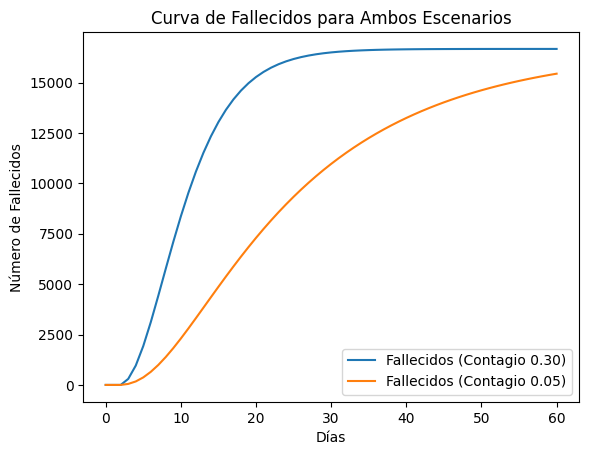

In [ ]:
# 6. Grafique la curva de fallecidos para ambos escenarios para todo el periodo de tiempo analizado.

dias_simulacion = list(range(dias + 1))

plt.plot(dias_simulacion, [i[4] for i in result_mod_evo1], label="Fallecidos (Contagio 0.30)")
plt.plot(dias_simulacion, [i[4] for i in result_mod_evo2], label="Fallecidos (Contagio 0.05)")
plt.title("Curva de Fallecidos para Ambos Escenarios")
plt.xlabel("Días")
plt.ylabel("Número de Fallecidos")
plt.legend()
plt.show()

<font color='green'>Fin actividad 2</font>